<a href="https://colab.research.google.com/github/maitysuvo19/Kolkata-Retailer-data-analysis/blob/main/retailer_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
from geopy.geocoders import Nominatim
#visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import norm, skew

In [ ]:
customer_df = pd.read_excel('/content/retailer_customer_data.xlsx')

In [ ]:
customer_df.head()

Customer_Id Customer_Location  ...  Category  Sub Category
0           22         Kalikapur  ...        11           146
1           22         Kalikapur  ...        11           146
2           22         Kalikapur  ...        11           146
3           22         Kalikapur  ...         5            35
4           22         Kalikapur  ...        13            96

[5 rows x 13 columns]

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2291 entries, 0 to 2290
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_Id        2291 non-null   int64  
 1   Customer_Location  2291 non-null   object 
 2   Latitude           0 non-null      float64
 3   Longitude          0 non-null      float64
 4   Order_Id           2291 non-null   int64  
 5   Item_Id            2291 non-null   int64  
 6   Quantity           2291 non-null   int64  
 7   Price              2291 non-null   float64
 8   Zone Code          2291 non-null   int64  
 9   Supplier Id        2291 non-null   int64  
 10  Item Description   2291 non-null   object 
 11  Category           2291 non-null   int64  
 12  Sub Category       2291 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 232.8+ KB


In [ ]:
x = (customer_df.dtypes == ('int64'))
integer_cols = list(x[x].index)
print("integer variables:")
print(integer_cols)

integer variables:
['Customer_Id', 'Order_Id', 'Item_Id', 'Quantity', 'Zone Code', 'Supplier Id', 'Category', 'Sub Category']


In [ ]:
ob = (customer_df.dtypes == ('object'))
Categorical_cols = list(ob[ob].index)
print("categorical variables:")
print(Categorical_cols)

categorical variables:
['Customer_Location', 'Item Description']


In [ ]:
print("Number of transactions: ",customer_df['Order_Id'].nunique())
print("Number of products bought: ", customer_df['Item_Id'].nunique())
print("Number of customers:", customer_df['Customer_Id'].nunique())
print('Number of customer location: ', customer_df['Customer_Location'].nunique())

Number of transactions:  273
Number of products bought:  930
Number of customers: 141
Number of customer location:  139


In [ ]:
np.sum(customer_df.isnull())

Customer_Id             0
Customer_Location       0
Latitude             2291
Longitude            2291
Order_Id                0
Item_Id                 0
Quantity                0
Price                   0
Zone Code               0
Supplier Id             0
Item Description        0
Category                0
Sub Category            0
dtype: int64

In [ ]:
customer_df['Customer_Location'].unique()

array(['Kalikapur', 'FLAT A10, SOURAV ABASAN, ED BLOCK, SEC-2, SALTLAKE',
       '4B Somtirtha Bhawan, 377 Jesore Road, Mrinalini Cinema, Nager Bazar, ',
       'A10 Sourav Abasan ED Block', '3 Jessore Road',
       'Flat-3B, Sagarika Apartment, 8/2/127, Aurobindo Sarani, Kamalapur(E), Dum Dum',
       '48, Market Street, KMC SWM Building, New Market Area',
       'Griha Apartment, 232, G.N. Shastri Sarani',
       'CL-212,salt lake,sector 2', 'E-06/302 Peerless Nagar',
       'Flat No 8E& 8H, Block B, Natural Top Apartment, 77/A Christopher Road, Topsia',
       'C1-39, KMD Road (Near 3no rail gate), Dumdum Cantonment, Kolkata-65',
       '53/2 Ballygunge Place', '46, Muktaram Babu Street',
       '9/11 pashupati bhattacharya road,senhati jheel paar,jheelum apartment,2nd floor',
       'C/o Major Amit Ranjan 6/9, (5th floor) officers S F accommodation,1 gokhel road, kolkata 20',
       'J7, MECON TOWER, 357 P.A.Shah Road',
       '40A Central Road, Flat 3, Jadavpur',
       '1A Sreepa

In [ ]:
customer_df.loc[43:60,['Customer_Id','Customer_Location']] = [28,'A10 Sourav Abasan ED Block']

In [ ]:
customer_df['Customer_Location'].unique()

array(['Kalikapur', 'A10 Sourav Abasan ED Block',
       '4B Somtirtha Bhawan, 377 Jesore Road, Mrinalini Cinema, Nager Bazar, ',
       '3 Jessore Road',
       'Flat-3B, Sagarika Apartment, 8/2/127, Aurobindo Sarani, Kamalapur(E), Dum Dum',
       '48, Market Street, KMC SWM Building, New Market Area',
       'Griha Apartment, 232, G.N. Shastri Sarani',
       'CL-212,salt lake,sector 2', 'E-06/302 Peerless Nagar',
       'Flat No 8E& 8H, Block B, Natural Top Apartment, 77/A Christopher Road, Topsia',
       'C1-39, KMD Road (Near 3no rail gate), Dumdum Cantonment, Kolkata-65',
       '53/2 Ballygunge Place', '46, Muktaram Babu Street',
       '9/11 pashupati bhattacharya road,senhati jheel paar,jheelum apartment,2nd floor',
       'C/o Major Amit Ranjan 6/9, (5th floor) officers S F accommodation,1 gokhel road, kolkata 20',
       'J7, MECON TOWER, 357 P.A.Shah Road',
       '40A Central Road, Flat 3, Jadavpur',
       '1A Sreepal Apartments, 107 N S C Bose Road, ',
       '18 Jagan

In [ ]:
print("Avg. number of products per order in df: ",  round(customer_df['Item_Id'].count() / customer_df['Order_Id'].nunique(),2) )

Avg. number of products per order in df:  8.39


# Exploratory Data Analysis

In [ ]:
customer_df.describe()

Customer_Id  Latitude  Longitude  ...  Supplier Id     Category  Sub Category
count  2291.000000       0.0        0.0  ...  2291.000000  2291.000000   2291.000000
mean    361.061982       NaN        NaN  ...     2.589699    10.269315     72.744653
std     198.514352       NaN        NaN  ...     1.553741     6.722277     46.042081
min      22.000000       NaN        NaN  ...     1.000000     1.000000      1.000000
25%     207.000000       NaN        NaN  ...     1.000000     3.000000     27.000000
50%     329.000000       NaN        NaN  ...     3.000000    11.000000     79.000000
75%     499.000000       NaN        NaN  ...     4.000000    17.000000    117.000000
max     778.000000       NaN        NaN  ...     6.000000    22.000000    191.000000

[8 rows x 11 columns]

Exploring the Orders

a. What's the average number of orders per customer?

In [ ]:
#Find the unique number of InvoiceNo  per customer
groupby_customers = pd.DataFrame(customer_df.groupby('Customer_Id')['Order_Id'])

groupby_customers.head()

0                                                  1
0  22  0      93
1      93
2      93
3      93
4     ...
1  28  43     19
44     19
45     19
46     19
47    ...
2  29  61    32
62    32
63    32
64    32
Name: Orde...
3  34  65    868
66    868
67    868
68    868
69    ...
4  40  81     124
82     348
83     348
84     124
85...

In [ ]:
groupby_customers.iloc[0][1]

0      93
1      93
2      93
3      93
4       9
5       9
6      93
7      93
8       9
9       9
10      9
11     93
12      9
13     93
14      9
15      9
16     60
17      9
18     93
19      9
20      9
21      9
22      9
23     60
24      9
25      9
26      9
27     60
28     93
29      9
30      9
31     93
32     93
33     60
34     93
35      9
36      9
37      9
38     60
39      9
40    293
41    293
42    293
Name: Order_Id, dtype: int64

In [ ]:
groupby_customers = pd.DataFrame(customer_df.groupby('Customer_Id')['Order_Id'].unique())

groupby_customers.head()

Order_Id
Customer_Id                              
22                       [93, 9, 60, 293]
28                          [19, 300, 32]
29                                   [32]
34                        [868, 211, 374]
40           [124, 348, 7, 214, 881, 112]

In [ ]:
groupby_customers1 = pd.DataFrame(customer_df.groupby('Customer_Id')['Order_Id'].nunique())
groupby_customers1.columns=['Total No Of Orders For Each Customer']
groupby_customers1.sort_values(by='Total No Of Orders For Each Customer', ascending=False,inplace=True)
groupby_customers1=groupby_customers1.reset_index()
#groupby_customers1.columns=['Customer_Id']

In [ ]:
groupby_customers1

Customer_Id  Total No Of Orders For Each Customer
0            329                                    16
1            316                                    15
2             81                                     9
3            146                                     9
4            127                                     9
..           ...                                   ...
136          255                                     1
137          251                                     1
138          247                                     1
139          244                                     1
140          778                                     1

[141 rows x 2 columns]

In [ ]:
groupby_customers1['Customer_Id']=groupby_customers1['Customer_Id'].astype('str')

In [ ]:
groupby_customers1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Customer_Id                           141 non-null    object
 1   Total No Of Orders For Each Customer  141 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [ ]:

groupby_customers1.describe()

Total No Of Orders For Each Customer
count                            141.000000
mean                               1.943262
std                                2.257600
min                                1.000000
25%                                1.000000
50%                                1.000000
75%                                2.000000
max                               16.000000

Text(0.5, 0, 'Total No.Of Orders')

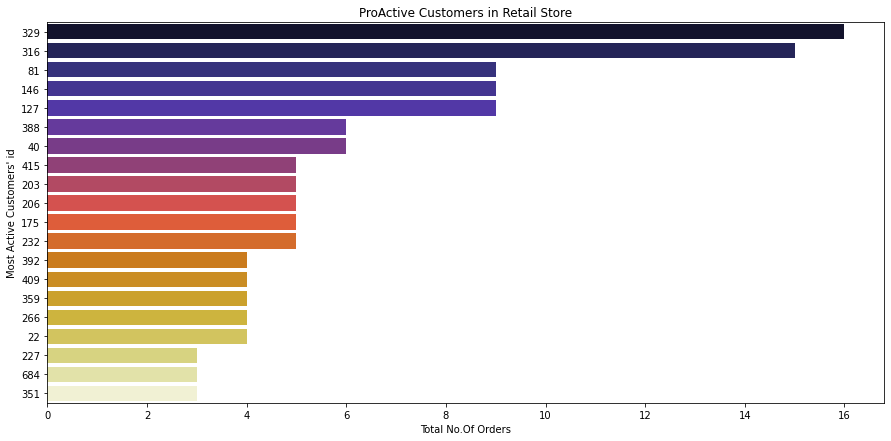

In [ ]:
rcParams['figure.figsize'] = 15,7
sns.barplot(x=groupby_customers1['Total No Of Orders For Each Customer'][:20],y=groupby_customers1['Customer_Id'][:20],palette="CMRmap")
#sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("ProActive Customers in Retail Store")
plt.ylabel("Most Active Customers' id")
plt.xlabel("Total No.Of Orders")

In [ ]:
#groupby_customers = pd.DataFrame(customer_df.groupby('Customer_Id')['Order_Id'].nunique())
#groupby_customers.sort_values(by='Order_Id', ascending=False,inplace=True)
#groupby_customers.index.astype(str)
#for i in groupby_customers.index:
  #i=str(i)
#groupby_customers.index

In [ ]:
#fig1, ax1 = plt.subplots(figsize=(12,6),dpi=100)
#ax1=sns.barplot(x=groupby_customers['Order_Id'][:20], y=groupby_customers.index[:20], data=groupby_customers, estimator=max, ax=ax1)
#ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")

#plt.show()

The average number of orders per customer is 1.936170.

In [ ]:
item_quantity_df=customer_df[["Item_Id", "Quantity","Item Description"]].groupby(['Item_Id','Item Description']).sum().sort_values(by='Quantity', ascending=False)

In [ ]:
item_quantity_df

Quantity
Item_Id Item Description                          
1379    Engine Mustard Oil Kachi Ghani          64
1602    Ganesh Maida                            50
3994    Tata Salt                               44
385     Aro Sugar                               35
4292    Whiskas Junior Tuna Fish                33
...                                            ...
2113    Kissan Sauce Maker                       1
2086    Kims Vegetable Noodles Pack of 4         1
2077    Keya Italian Seasoning                   1
2072    Keya Freeze Dried Oregano                1
5158    Mayurank Sendha Namak                    1

[930 rows x 1 columns]

In [ ]:
item_quantity_df.describe()

Quantity
count  930.000000
mean     3.381720
std      4.923253
min      1.000000
25%      1.000000
50%      2.000000
75%      4.000000
max     64.000000

average quantity per product is 3.381720

1.   List item
2.   List item



In [ ]:
item_quantity_df1=pd.DataFrame(customer_df[["Quantity","Item Description"]].groupby('Item Description')['Quantity'].sum())
item_quantity_df1.columns=['Total Quantity per Items are purchased']
item_quantity_df1.sort_values(by='Total Quantity per Items are purchased', ascending=False,inplace=True)
item_quantity_df1

Total Quantity per Items are purchased
Item Description                                                       
Engine Mustard Oil Kachi Ghani                                       64
Aashirvaad Atta                                                      60
Ganesh Maida                                                         50
Aro Sugar                                                            45
Tata Salt                                                            44
...                                                                 ...
Livon Hair Gain Tonic                                                 1
Bio Walnut Skin Polisher Scrub                                        1
Lipton Darjeeling Tea                                                 1
Lifebuoy Nature Hand Sanitizer                                        1
Johnson Blossoms Baby Powder                                          1

[797 rows x 1 columns]

Text(0, 0.5, 'Number of Items')

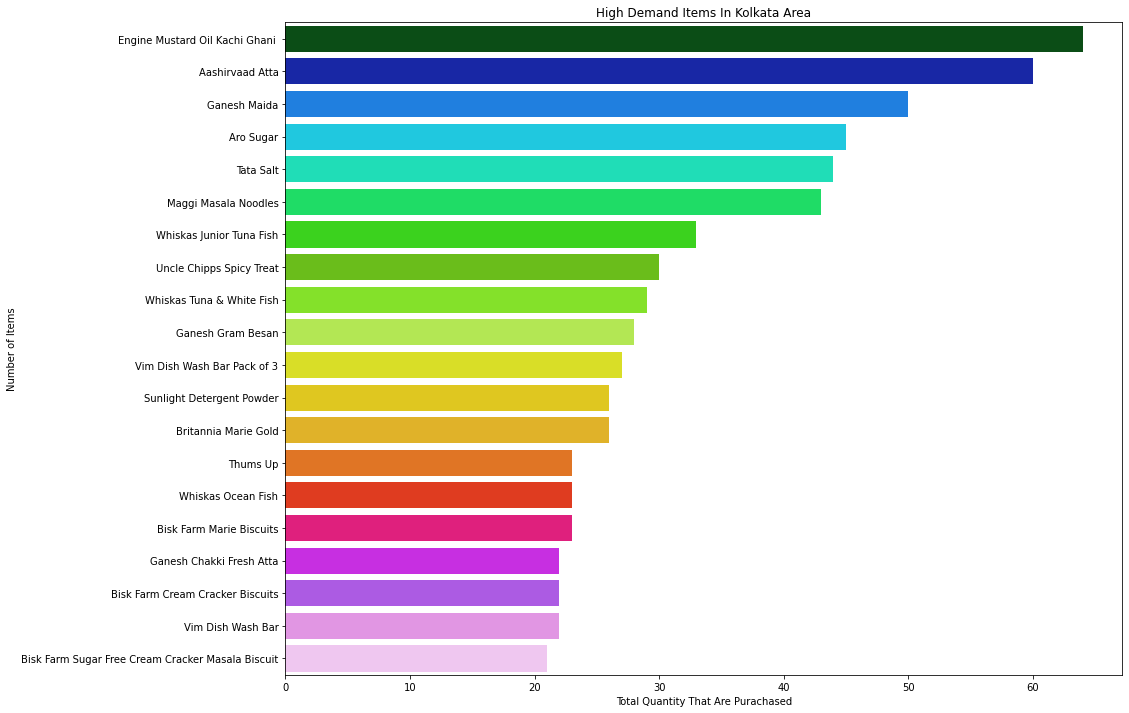

In [ ]:
rcParams['figure.figsize'] = 15,12
sns.barplot(x=item_quantity_df1['Total Quantity per Items are purchased'][:20],y=item_quantity_df1.index[:20],palette="gist_ncar")
#sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("High Demand Items In Kolkata Area")
plt.xlabel('Total Quantity That Are Purachased')
plt.ylabel("Number of Items")

No. Of Orders Per Item

In [ ]:
#Are there some products that are extremely popular?
#groupby_item = pd.DataFrame(customer_df.groupby('Item_Id')['Order_Id'].nunique())
#groupby_item.columns = ['Number of Orders per Item']
#groupby_item.sort_values(by='Number of Orders per Item',ascending=False,inplace=True)
#groupby_item

In [ ]:
groupby_no_of_orders_per_item = pd.DataFrame(customer_df.groupby('Item_Id')['Order_Id'].nunique())
groupby_no_of_orders_per_item.columns = ['Number of Orders per Item']
groupby_no_of_orders_per_item.sort_values(by='Number of Orders per Item',ascending=False,inplace=True)
groupby_no_of_orders_per_item.head()

Number of Orders per Item
Item_Id                           
1379                            33
1602                            30
3994                            28
50                              23
49                              20

In [ ]:
groupby_no_of_orders_per_item.describe()

Number of Orders per Item
count                 930.000000
mean                    2.463441
std                     2.925199
min                     1.000000
25%                     1.000000
50%                     1.000000
75%                     3.000000
max                    33.000000

In [ ]:
#Are there some products that are extremely popular?
groupby_item1 = pd.DataFrame(customer_df.groupby('Item Description')['Order_Id'].nunique())
groupby_item1.columns = ['Number of Orders per Item']
groupby_item1.sort_values(by='Number of Orders per Item',ascending=False,inplace=True)
groupby_item1

Number of Orders per Item
Item Description                                                     
Aashirvaad Atta                                                    46
Engine Mustard Oil Kachi Ghani                                     33
Ganesh Maida                                                       30
Tata Salt                                                          28
Aro Sugar                                                          27
...                                                               ...
Kitchens of India Dal Bukhara Ready To Eat                          1
Kissan Tomchi Ketchup                                               1
Kissan Tomato Ketchup                                               1
Kissan Sauce Sweet & Spicy                                          1
Johnson Blossoms Baby Powder                                        1

[797 rows x 1 columns]

Text(0, 0.5, 'Number of Items')

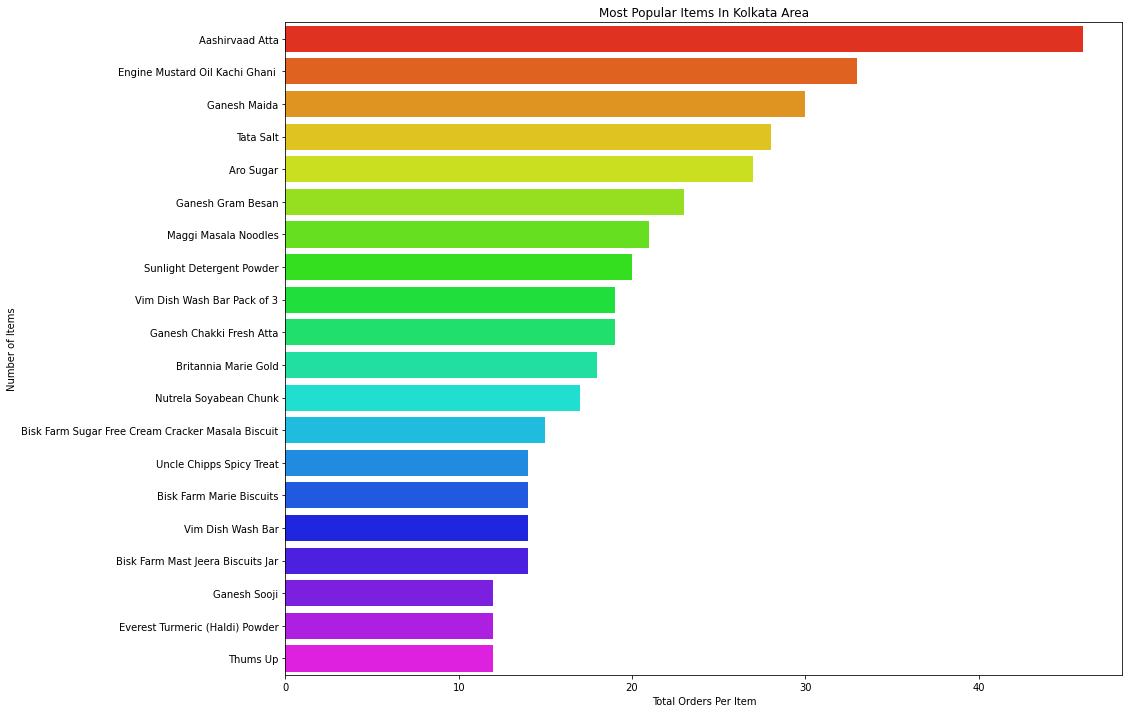

In [ ]:
rcParams['figure.figsize'] = 15,12
sns.barplot(x=groupby_item1['Number of Orders per Item'][:20],y=groupby_item1.index[:20],palette="gist_rainbow")
#sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most Popular Items In Kolkata Area")
plt.xlabel('Total Orders Per Item')
plt.ylabel("Number of Items")

In [ ]:
#What's the distribution of the number of items the customers buy?

What's the average number of unqiue items per order and per customer?

In [ ]:
groupby_order_id = pd.DataFrame(customer_df.groupby('Order_Id')['Item_Id'].nunique())
groupby_order_id.columns = ['Number of Items per Order']
groupby_order_id.sort_values(by='Number of Items per Order',ascending=False,inplace=True)
groupby_order_id=groupby_order_id.reset_index()
groupby_order_id['Order_Id']=groupby_order_id['Number of Items per Order'].astype('str')

In [ ]:
groupby_order_id.describe()

Number of Items per Order
count                 273.000000
mean                    8.391941
std                     7.312123
min                     1.000000
25%                     4.000000
50%                     6.000000
75%                    12.000000
max                    48.000000

Number of Items per Customer

In [ ]:
Items_per_Customer_df = pd.DataFrame(customer_df.groupby('Customer_Id')['Item_Id'].nunique())
Items_per_Customer_df.columns = ['Number of Items per Customer']
Items_per_Customer_df.sort_values(by='Number of Items per Customer',ascending=False,inplace=True)
Items_per_Customer_df=Items_per_Customer_df.reset_index()
Items_per_Customer_df['Customer_Id']=Items_per_Customer_df['Customer_Id'].astype('str')
Items_per_Customer_df

Customer_Id  Number of Items per Customer
0           329                            82
1           505                            80
2           544                            74
3           359                            64
4           127                            54
..          ...                           ...
136         741                             1
137          45                             1
138         516                             1
139         646                             1
140         676                             1

[141 rows x 2 columns]

In [ ]:
Items_per_Customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Customer_Id                   141 non-null    object
 1   Number of Items per Customer  141 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


Text(0, 0.5, "Customers' Id")

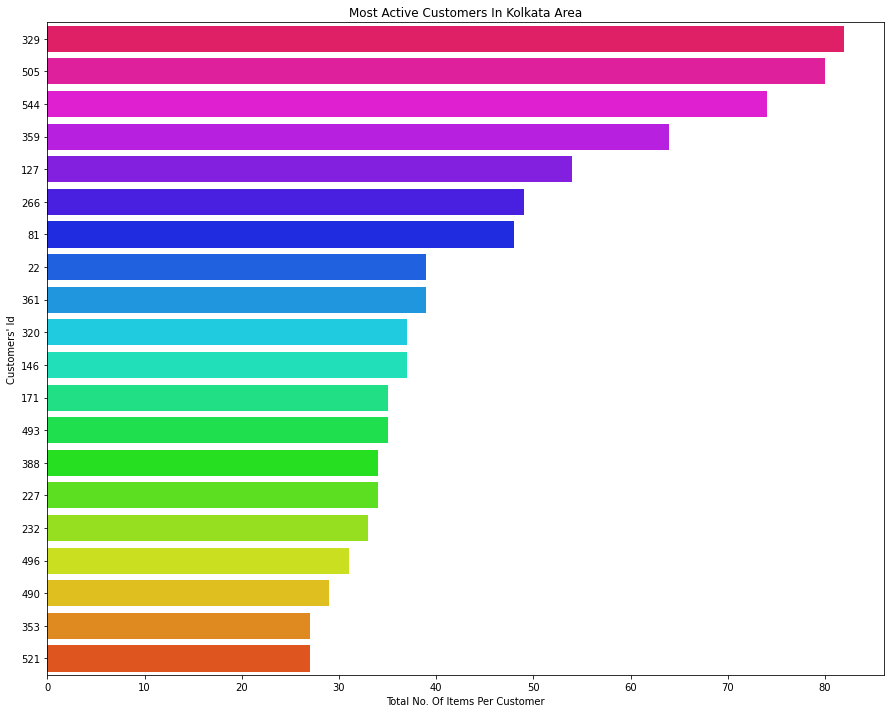

In [ ]:
rcParams['figure.figsize'] = 15,12
sns.barplot(x=Items_per_Customer_df['Number of Items per Customer'][:20],y=Items_per_Customer_df['Customer_Id'][:20],palette="hsv_r")
#sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most Active Customers In Kolkata Area")
plt.xlabel('Total No. Of Items Per Customer')
plt.ylabel("Customers' Id")

In [ ]:
Items_per_Customer_df.describe()

Number of Items per Customer
count                    141.000000
mean                      14.113475
std                       14.996234
min                        1.000000
25%                        5.000000
50%                        9.000000
75%                       17.000000
max                       82.000000

create total cost column

In [ ]:
customer_df['Total_Cost'] = customer_df['Quantity'] * customer_df['Price']

In [ ]:
customer_df.head()

Customer_Id Customer_Location  Latitude  ...  Category  Sub Category  Total_Cost
0           22         Kalikapur       NaN  ...        11           146       27.00
1           22         Kalikapur       NaN  ...        11           146       27.00
2           22         Kalikapur       NaN  ...        11           146       27.00
3           22         Kalikapur       NaN  ...         5            35       15.00
4           22         Kalikapur       NaN  ...        13            96       14.28

[5 rows x 14 columns]

In [ ]:
#sns.distplot(customer_df['Total_Cost'])
#plt.show()

In [ ]:
x = (customer_df.dtypes == ('int64'))
integer_cols = list(x[x].index)
print("integer variables:")
print(integer_cols)

integer variables:
['Customer_Id', 'Order_Id', 'Item_Id', 'Quantity', 'Zone Code', 'Supplier Id', 'Category', 'Sub Category']


In [ ]:
ob = (customer_df.dtypes == ('object'))
Categorical_cols = list(ob[ob].index)
print("categorical variables:")
print(Categorical_cols)

categorical variables:
['Customer_Location', 'Item Description']


In [ ]:
Float = (customer_df.dtypes == ('float64'))
Float_cols = list(Float[Float].index)
print("Float variables:")
print(Float_cols)

Float variables:
['Latitude', 'Longitude', 'Price', 'Total_Cost']


In [ ]:
def displot_violinboxplot(col):
 
 col=customer_df[col]
 hist_data = [col]
 group_labels = [' Distribution of the variable by displot']
 colors=['Deeppink']
 fig1 = ff.create_distplot(hist_data, group_labels,colors=colors,bin_size=[1]) #custom bin_size
 fig1.update_layout(
    autosize=False,
    width=800,
    height=400,)
 
 fig1.show()
 fig2 = go.Figure(data=go.Violin(y=col, box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='violinboxplot'))
 fig2.update_layout(
    autosize=False,
    width=800,
    height=400,)

 fig2.update_layout(yaxis_zeroline=False,title="Distribution of the column")
 fig2.show()

In [ ]:
displot_violinboxplot('Quantity')

In [ ]:
displot_violinboxplot('Price')


 mu = 91.42 and sigma = 112.32



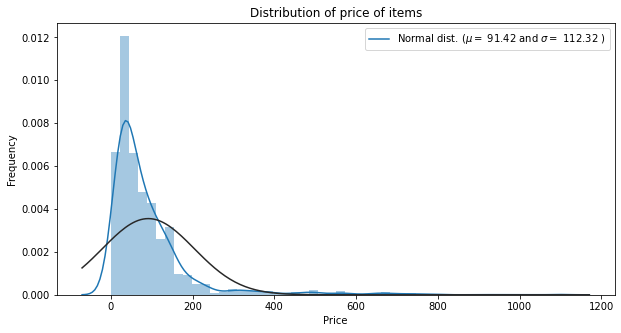

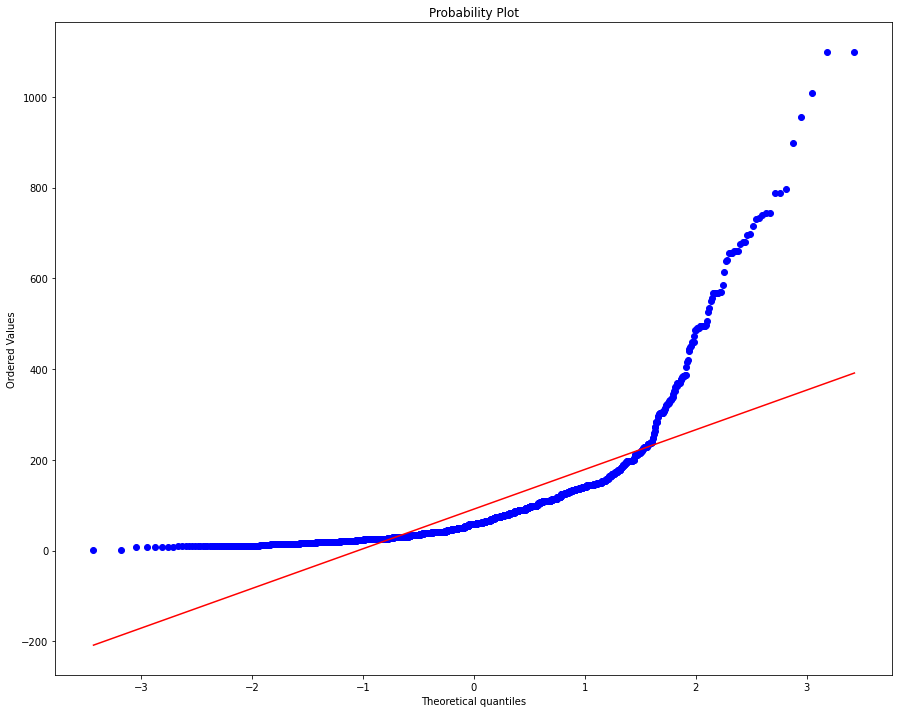

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(customer_df['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(customer_df['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of price of items')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(customer_df['Price'], plot=plt)
plt.show()

In [ ]:
displot_violinboxplot('Total_Cost')


 mu = 115.93 and sigma = 175.34



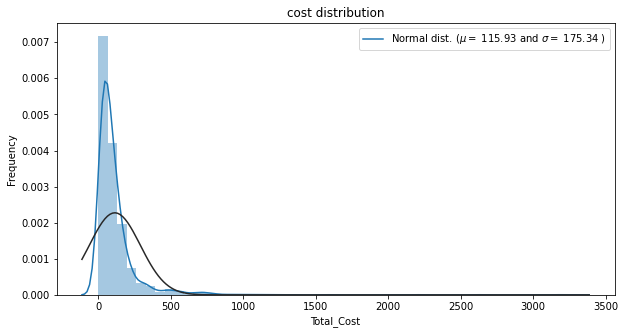

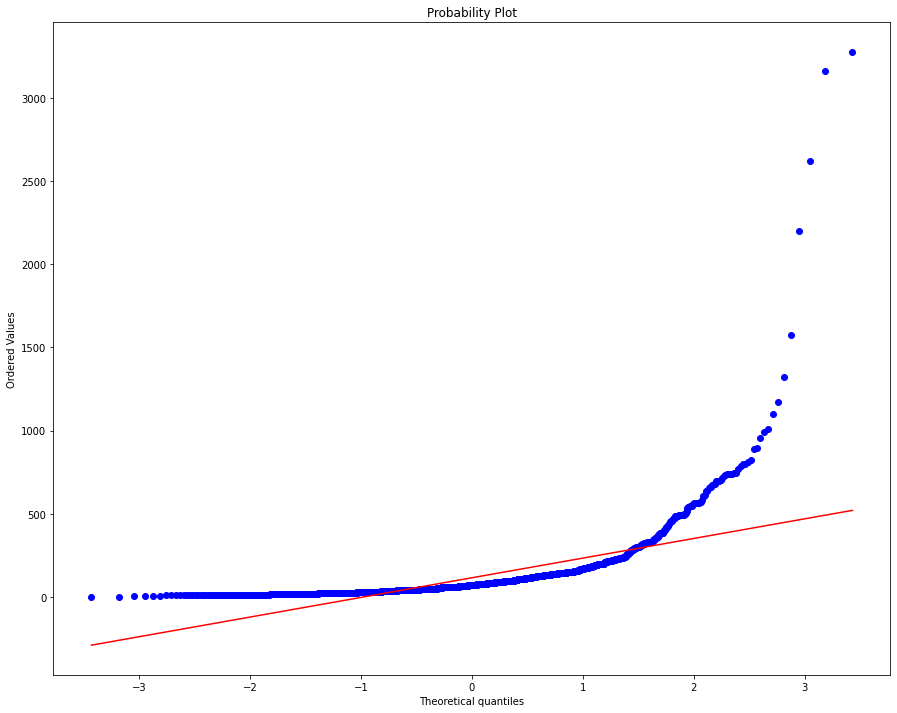

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(customer_df['Total_Cost'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(customer_df['Total_Cost'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('cost distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(customer_df['Total_Cost'], plot=plt)
plt.show()

In [ ]:
location_df = pd.DataFrame(customer_df.groupby('Customer_Location')['Customer_Id'].nunique())
location_df.columns = ['Number of Customers by location']
location_df.sort_values('Number of Customers by location', inplace=True, ascending=False)

In [ ]:
location_df

Number of Customers by location
Customer_Location                                                                  
44/13,Garcha Road,2nd Floor, Kolkata-700019,Wes...                                2
A10 Sourav Abasan ED Block                                                        2
63A PRAMANICK GHAT ROAD                                                           2
'DEBO VILLA'. Plot No BE-78. Premises No. 02-13...                                1
Flat 3, Mridula Apartment, 86 Selimpur Road                                       1
...                                                                             ...
46, Muktaram Babu Street                                                          1
45A Burosibtala Main Road, Jasmine 3A                                             1
44/C Gokul Boral Street, 2nd Floor                                                1
42/170 NEW BALLYGUNGE ROAD, 3RD FLOOR                                             1
uv 02 2a, udayan/utsav condoville, 1050/1 surve...                                1

[138 rows x 1 columns]

No. Of Items are purchased in each location

In [ ]:
location_items_df = pd.DataFrame(customer_df.groupby('Customer_Location')['Item_Id'].nunique())
location_items_df.columns = ['Number of Items by location']
location_items_df.sort_values('Number of Items by location', inplace=True, ascending=False)

In [ ]:
location_items_df

Number of Items by location
Customer_Location                                                              
63A PRAMANICK GHAT ROAD                                                      93
1/4, Fakir Ghosh Lane                                                        80
11/1b,radha madhab saha lane                                                 74
m-8 Prantika, mahamayapur                                                    64
9/11 pashupati bhattacharya road,senhati jheel ...                           54
...                                                                         ...
1/7C Khanpur Road, TRIPURARI APARTMENT (Ground ...                            1
12A,MIDDLE ROAD,P.O.-ENTALLY,OPPOSITE -RAMLILA ...                            1
flat # f7, mayuri apt, 1a-b b sengupta rd, oppo...                            1
Ground Floor, 87/186 RSC Mullick Road, Gangulib...                            1
Flat-3B, Sagarika Apartment, 8/2/127, Aurobindo...                            1

[138 rows x 1 columns]

Text(0.5, 1.0, 'Most Popular High Demand Products In North 24 Parganas & Kolkata Area')

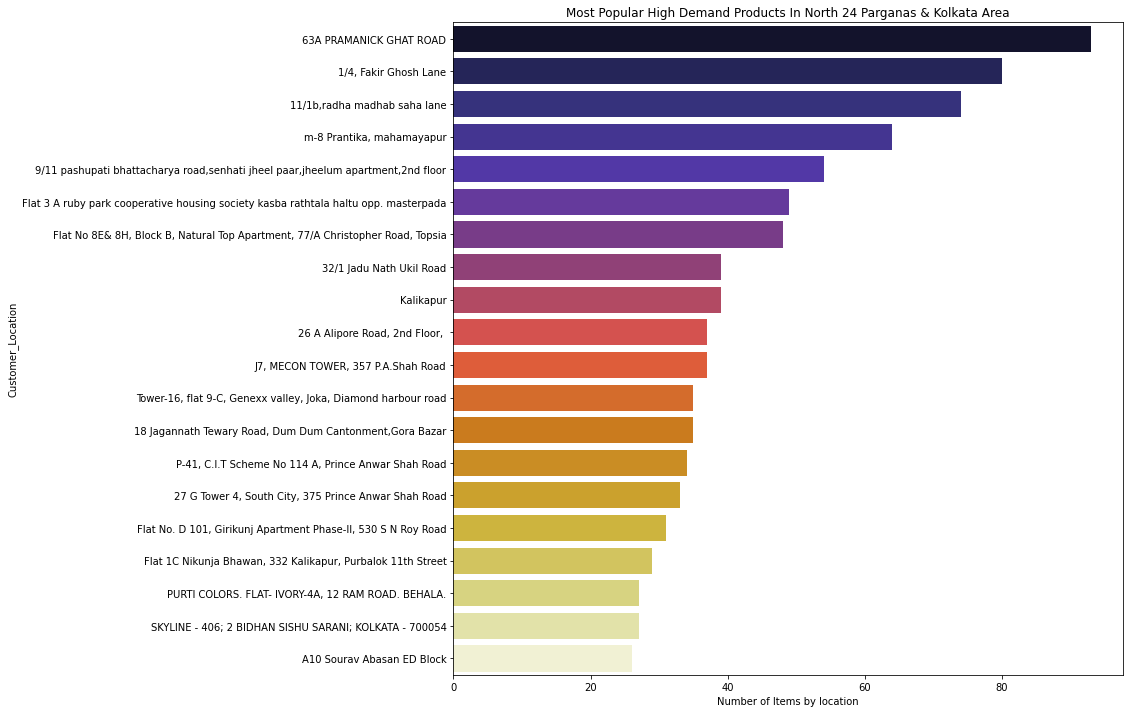

In [ ]:
rcParams['figure.figsize'] = 12,12
sns.barplot(y=location_items_df.index[:20], x=location_items_df['Number of Items by location'][:20],palette='CMRmap')
plt.title('Most Popular High Demand Products In North 24 Parganas & Kolkata Area')

No. Of orders are done in each location

In [ ]:
location_orders=pd.DataFrame(customer_df[['Customer_Location','Item_Id','Order_Id']].groupby('Customer_Location')['Order_Id'].nunique())
location_orders.sort_values('Order_Id', inplace=True, ascending=False)
location_orders.rename(columns = {'Order_Id':'Total No Of Transaction'}, inplace = True)
location_orders
#location_orders['item description']=customer_df.groupby('Category')['Item Description']

Total No Of Transaction
Customer_Location                                                          
63A PRAMANICK GHAT ROAD                                                  22
AC 145 Salt Lake, Sector 1                                               15
J7, MECON TOWER, 357 P.A.Shah Road                                        9
9/11 pashupati bhattacharya road,senhati jheel ...                        9
Flat No 8E& 8H, Block B, Natural Top Apartment,...                        9
...                                                                     ...
485/493,D.H.Road,poraswathatala                                           1
48, Market Street, KMC SWM Building, New Market...                        1
48, Market Street, KMC SWM Building                                       1
479 Lake Gardens, Flat number: B/2(Ground Floor...                        1
uv 02 2a, udayan/utsav condoville, 1050/1 surve...                        1

[138 rows x 1 columns]

Text(0.5, 1.0, 'North 24 Parganas & Kolkata Areas where frequent transactions are done')

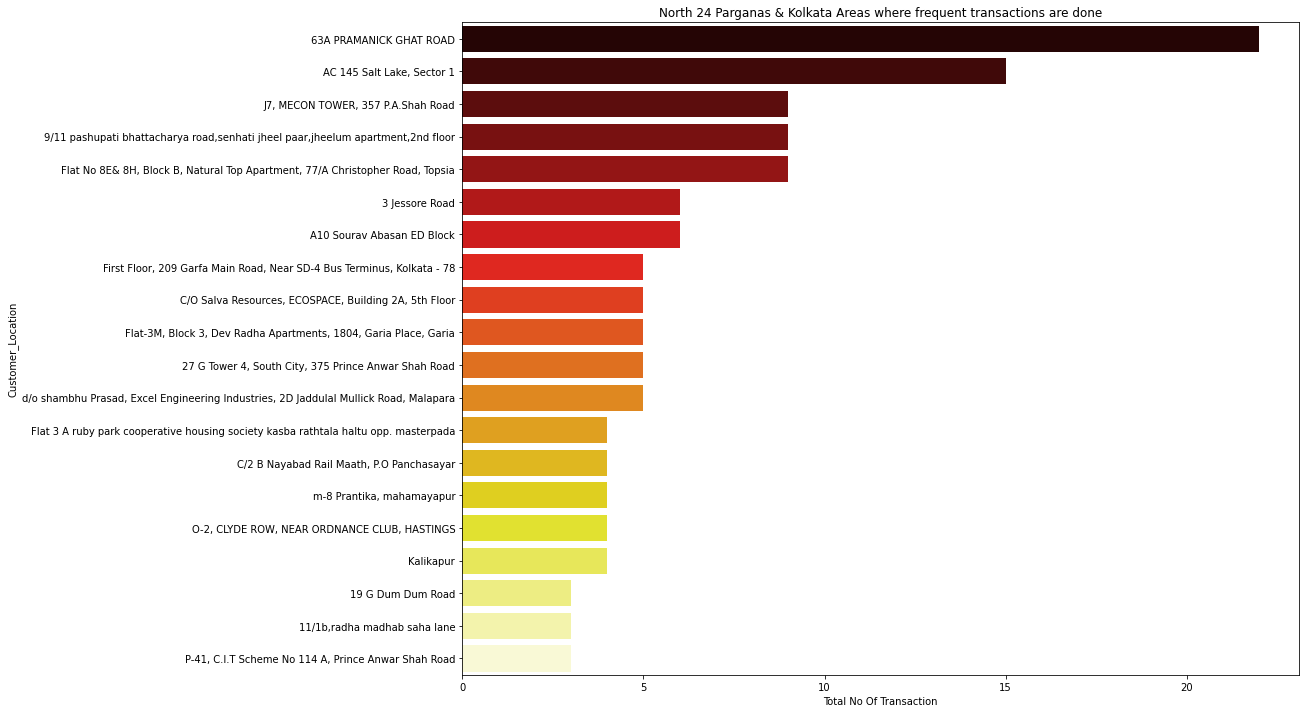

In [ ]:
rcParams['figure.figsize'] = 15,12
sns.barplot(y=location_orders.index[:20], x=location_orders['Total No Of Transaction'][:20],palette='hot')
plt.title('North 24 Parganas & Kolkata Areas where frequent transactions are done')

In [ ]:
location_Cost=pd.DataFrame(customer_df[['Customer_Location','Total_Cost']].groupby('Customer_Location')['Total_Cost'].sum())
location_Cost.sort_values('Total_Cost', inplace=True, ascending=False)
location_Cost.rename(columns = {'Total_Cost':'Total Amount Of Transaction'}, inplace = True)
location_Cost

Total Amount Of Transaction
Customer_Location                                                              
63A PRAMANICK GHAT ROAD                                                14529.87
Flat No 8E& 8H, Block B, Natural Top Apartment,...                     13485.36
1/4, Fakir Ghosh Lane                                                  11033.97
11/1b,radha madhab saha lane                                            9070.21
MANGALALOK 3rd floor flat 3B 557 purba sinthi b...                      7975.82
...                                                                         ...
27, Gobra Gorosthan Road                                                 172.91
Tower 33, Flat 11F, Genexx Valley, Joka, Diamon...                       149.00
1/7C Khanpur Road, TRIPURARI APARTMENT (Ground ...                       135.00
12A,MIDDLE ROAD,P.O.-ENTALLY,OPPOSITE -RAMLILA ...                        98.50
Flat-3B, Sagarika Apartment, 8/2/127, Aurobindo...                        59.40

[138 rows x 1 columns]

Text(0.5, 1.0, 'North 24 Parganas & Kolkata Areas where huge amount of transactions are done')

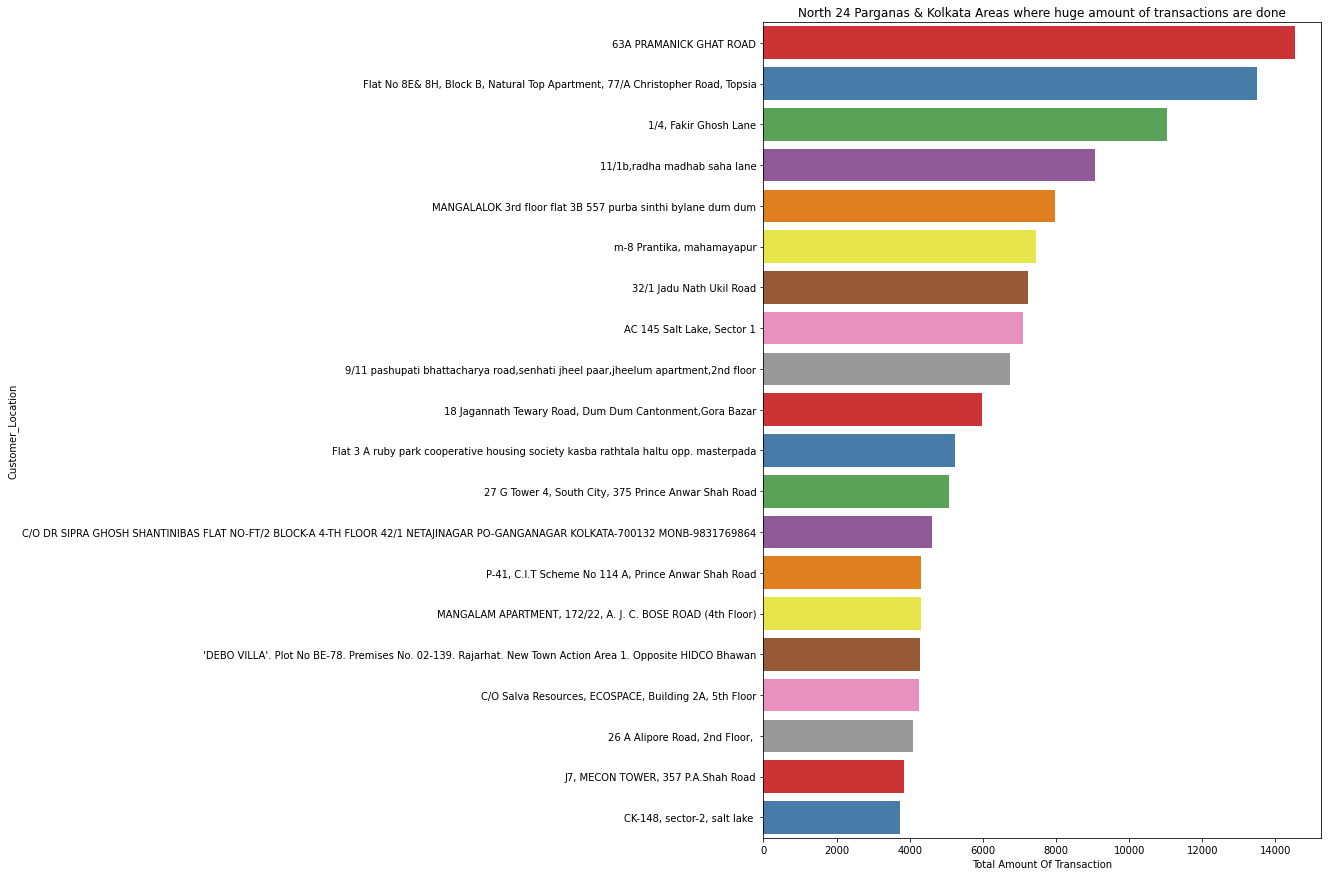

In [ ]:
rcParams['figure.figsize'] = 10,15
sns.barplot(y=location_Cost.index[:20], x=location_Cost['Total Amount Of Transaction'][:20],palette='Set1')
plt.title('North 24 Parganas & Kolkata Areas where huge amount of transactions are done')

In [ ]:
#fig1, ax1 = plt.subplots(figsize=(12,6),dpi=100)
#ax1=sns.barplot(x='Customer_Location', y='Total_Cost', data=customer_df, estimator=max, ax=ax1)
#ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")
#plt.show()

In [ ]:
#fig1, ax1 = plt.subplots(figsize=(12,6),dpi=100)
#ax1=sns.barplot(x=location_Cost['Total_Cost'][:10], y=location_Cost.index[:10], data=location_Cost, estimator=max, ax=ax1)
#ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")
#plt.show()

High Demand Daily Used Items In North 24 Porganas & Kolkata Locations 

In [ ]:
item_total_cost_df=customer_df[["Item_Id", "Total_Cost","Item Description"]].groupby(['Item_Id','Item Description']).sum().sort_values(by='Total_Cost', ascending=False)

In [ ]:
item_total_cost_df

Total_Cost
Item_Id Item Description                                  
1379    Engine Mustard Oil Kachi Ghani             7025.12
1907    India Gate Basmati Rice Super              6551.60
50      Aashirvaad Atta                            4310.00
3205    Pampers Diapers Large                      4102.80
1380    Engine Mustard Oil Kachi Ghani             3391.00
...                                                    ...
870     Cheetos Cheese Puffs                          9.85
4143    Uncle Chipps Chatpata Masala                  9.50
5158    Mayurank Sendha Namak                         7.00
2926    Nescafe Classic Jar                           1.00
3961    Surf Excel Quick Wash Detergent Powder        1.00

[930 rows x 1 columns]

In [ ]:
item_total_cost_df1=customer_df[["Total_Cost","Item Description"]].groupby(['Item Description']).sum().sort_values(by='Total_Cost', ascending=False)
item_total_cost_df1.rename(columns = {'Total_Cost':'Aggregate Amount Of Money Spend per Item'}, inplace = True)

Text(0.5, 1.0, 'High Demand Daily Used Items')

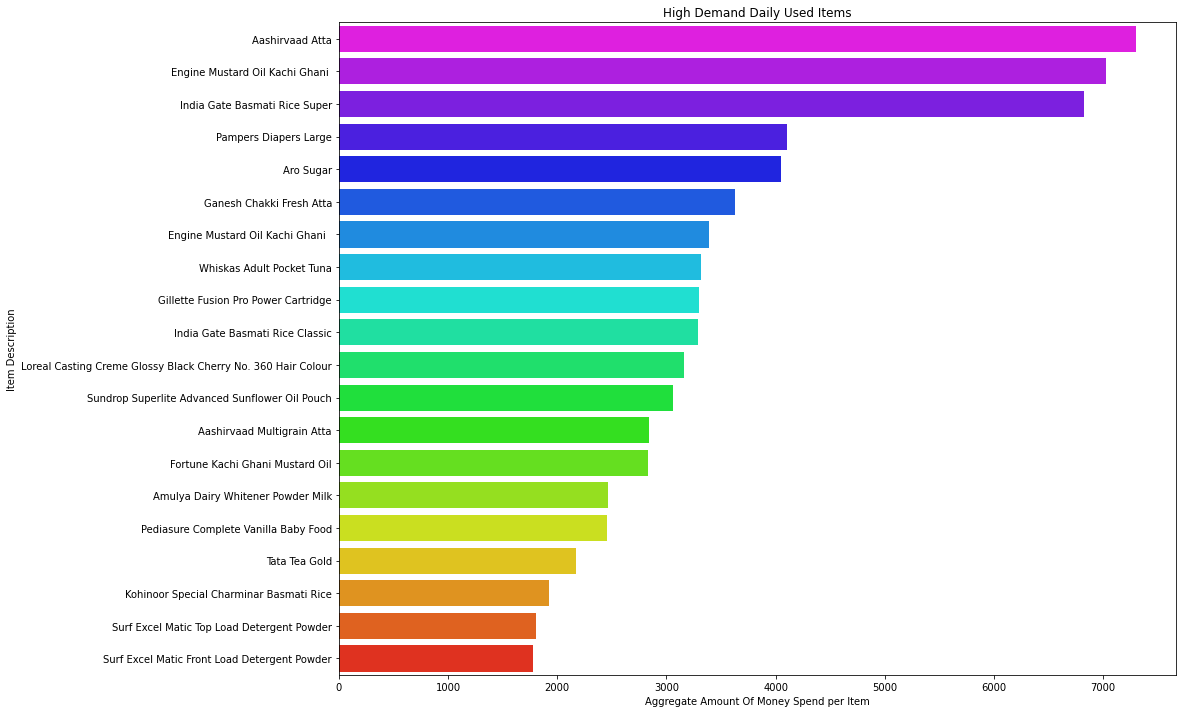

In [ ]:
rcParams['figure.figsize'] = 15,12
sns.barplot(y=item_total_cost_df1.index[:20], x=item_total_cost_df1['Aggregate Amount Of Money Spend per Item'][:20],palette='gist_rainbow_r')
plt.title('High Demand Daily Used Items')

In [ ]:
customer_total_cost_df=customer_df[["Customer_Id", "Total_Cost"]].groupby(['Customer_Id']).sum().sort_values(by='Total_Cost', ascending=False)
customer_total_cost_df=customer_total_cost_df.reset_index()
customer_total_cost_df.rename(columns = {'Total_Cost':'Total amount of cost spend to purchase commodities'}, inplace = True)
customer_total_cost_df['Customer_Id']=customer_total_cost_df['Customer_Id'].astype('str')

In [ ]:
customer_total_cost_df

Customer_Id  Total amount of cost spend to purchase commodities
0            81                                           13485.36 
1           505                                           11033.97 
2           329                                           10817.11 
3           544                                            9070.21 
4           378                                            7975.82 
..          ...                                                ... 
136         522                                             172.91 
137         407                                             149.00 
138         516                                             135.00 
139         741                                              98.50 
140          45                                              59.40 

[141 rows x 2 columns]

In [ ]:
customer_total_cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 2 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Customer_Id                                         141 non-null    object 
 1   Total amount of cost spend to purchase commodities  141 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


Text(0.5, 1.0, 'High Potential Customers who spend more amount of money to purchase commodities')

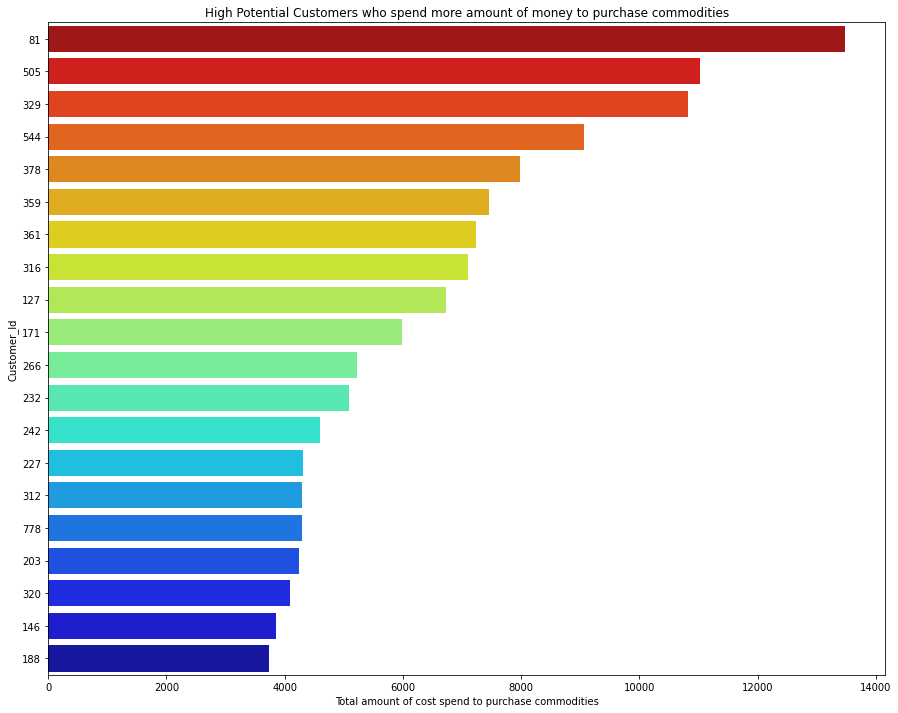

In [ ]:
rcParams['figure.figsize'] = 15,12
sns.barplot(y=customer_total_cost_df['Customer_Id'][:20], x=customer_total_cost_df['Total amount of cost spend to purchase commodities'][:20],palette='jet_r')
plt.title('High Potential Customers who spend more amount of money to purchase commodities')

how many customers purchased a particular item?


In [ ]:
groupby_items_df = pd.DataFrame(customer_df.groupby(['Item_Id','Item Description'])['Customer_Id'].nunique()).sort_values(by='Customer_Id', ascending=False)
groupby_items_df.rename(columns = {'Customer_Id':'no of customers purchased'}, inplace = True)
groupby_items_df

no of customers purchased
Item_Id Item Description                                                     
1379    Engine Mustard Oil Kachi Ghani                                     24
3994    Tata Salt                                                          24
1602    Ganesh Maida                                                       22
385     Aro Sugar                                                          15
49      Aashirvaad Atta                                                    14
...                                                                       ...
2037    Kelloggs Chocos Corn Flakes                                         1
2041    Kelloggs Chocos Moon and Stars Corn Flakes                          1
2065    Keo Karpin Ayurvedic Massage Oil                                    1
2067    Keo Karpin Hair Oil                                                 1
5158    Mayurank Sendha Namak                                               1

[930 rows x 1 columns]

In [ ]:
groupby_items_df1 = pd.DataFrame(customer_df.groupby('Item Description')['Customer_Id'].nunique()).sort_values(by='Customer_Id', ascending=False)
groupby_items_df1.rename(columns = {'Customer_Id':'no of customers have purchased'}, inplace = True)
groupby_items_df1

no of customers have purchased
Item Description                                                       
Aashirvaad Atta                                                      28
Tata Salt                                                            24
Engine Mustard Oil Kachi Ghani                                       24
Aro Sugar                                                            23
Ganesh Maida                                                         22
...                                                                 ...
MDH Chana Masala Powder                                               1
Lux Strawberry and Cream Soap Pack of 3                               1
Lux Strawberry and Cream Body Wash                                    1
Lux Strawberry Cream Soap Pack of 6                                   1
Johnson Blossoms Baby Powder                                          1

[797 rows x 1 columns]

Text(0.5, 1.0, 'Items which are purchased by most of customers')

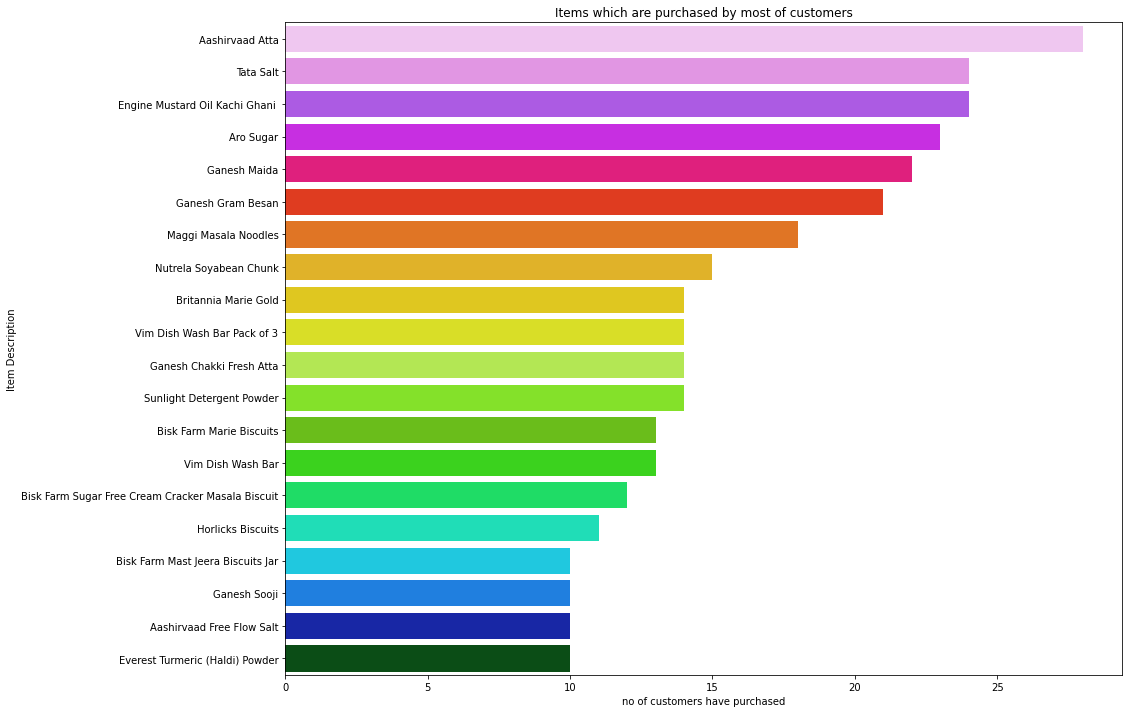

In [ ]:
rcParams['figure.figsize'] = 15,12
sns.barplot(y=groupby_items_df1.index[:20], x=groupby_items_df1['no of customers have purchased'][:20],palette='gist_ncar_r')
plt.title('Items which are purchased by most of customers')

how many items are there for a particular category?


In [ ]:

groupby_item_category_df = pd.DataFrame(customer_df.groupby('Category')['Item_Id'].nunique()).sort_values(by='Item_Id', ascending=False)
groupby_item_category_df.rename(columns = {'Item_Id':'no of different items'}, inplace = True)
groupby_item_category_df

no of different items
Category                       
18                          124
20                          114
5                           109
11                           87
3                            75
2                            66
8                            52
12                           47
13                           40
16                           31
14                           31
1                            24
7                            22
10                           19
21                           16
22                           16
6                            14
15                           11
19                           11
17                           10
4                             8
9                             3

High demand Category 

In [ ]:
groupby_order_category_df = pd.DataFrame(customer_df.groupby('Category')['Order_Id'].nunique()).sort_values(by='Order_Id', ascending=False)
groupby_order_category_df.rename(columns = {'Order_Id':'no of times ordered'}, inplace = True)
groupby_order_category_df

no of times ordered
Category                     
20                        139
3                         135
5                         115
2                         110
11                        102
18                         91
7                          81
13                         73
8                          67
12                         59
22                         55
16                         52
14                         29
15                         28
1                          27
10                         25
19                         23
21                         22
6                          15
17                         14
4                          11
9                           3

How many items are there in a particular sub category

In [ ]:
groupby_item_sub_category_df = pd.DataFrame(customer_df.groupby('Sub Category')['Item_Id'].nunique()).sort_values(by='Item_Id', ascending=False)
groupby_item_sub_category_df.rename(columns = {'Item_Id':'no of items in each sub category'}, inplace = True)
groupby_item_sub_category_df

no of items in each sub category
Sub Category                                  
35                                          83
13                                          65
133                                         34
123                                         32
94                                          27
...                                        ...
69                                           1
107                                          1
71                                           1
75                                           1
191                                          1

[106 rows x 1 columns]

In [ ]:
groupby_order_sub_category_df = pd.DataFrame(customer_df.groupby('Sub Category')['Order_Id'].nunique()).sort_values(by='Order_Id', ascending=False)
groupby_order_sub_category_df.rename(columns = {'Order_Id':'no of times ordered'}, inplace = True)
groupby_order_sub_category_df

no of times ordered
Sub Category                     
13                            110
21                             89
35                             71
98                             64
133                            54
...                           ...
8                               1
69                              1
6                               1
50                              1
120                             1

[106 rows x 1 columns]

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
groupby_item_category_df = pd.DataFrame(customer_df.groupby('Category')['Item_Id'].nunique()).sort_values(by='Item_Id', ascending=False)
groupby_item_category_df.rename(columns = {'Item_Id':'no of different items'}, inplace = True)
groupby_item_category_df['item description']=customer_df.groupby('Category')['Item Description'].unique()

In [ ]:
pd.set_option('display.max_colwidth',None)

In [ ]:
groupby_item_category_df=groupby_item_category_df.reset_index()

In [ ]:
groupby_item_category_df.columns

Index(['Category', 'no of different items', 'item description'], dtype='object')

In [ ]:
#['Category']=groupby_item_category_df['Category'].astype('str')

In [ ]:
groupby_item_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Category               22 non-null     int64 
 1   no of different items  22 non-null     int64 
 2   item description       22 non-null     object
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


In [ ]:
groupby_item_category_df

Category  no of different items  \
0         18                    124   
1         20                    114   
2          5                    109   
3         11                     87   
4          3                     75   
5          2                     66   
6          8                     52   
7         12                     47   
8         13                     40   
9         16                     31   
10        14                     31   
11         1                     24   
12         7                     22   
13        10                     19   
14        21                     16   
15        22                     16   
16         6                     14   
17        15                     11   
18        19                     11   
19        17                     10   
20         4                      8   
21         9                      3   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
text =groupby_item_category_df['item description'][1]

In [ ]:
text

array(['Fanta', 'Sprite', 'Kissan Mango Squash', 'Manna Health Mix',
       'Maaza Mango Drink Pet Bottle',
       'Tata Tea Gold Leaf Natural Red Tea',
       'Nestea Iced Tea Premix Lemon',
       'Tropicana 100 percent Grape Juice',
       'Tropicana 100 percent Orange Juice', 'Glucon D Orange',
       'Nescafe Classic Jar',
       'Cadbury Bournvita Little Champs Health Drink', 'Kinley Soda',
       'Thums Up', 'Real Lichee Juice', 'Real Mango Juice',
       'Rallis Rose Syrup', 'Tata Tea Gold',
       'Womens Horlicks Chocolate Jar', 'Coca Cola',
       'Glucon D Original Pet Jar', 'Tata Agni Leaf Natural Red Tea',
       'Frooti Mango Pet Bottle', 'Tata Tetley Tea Bags',
       'Nescafe Classic Coffee Refill Pack', 'Glucon D Orange Jar',
       'Tata Tetley Tea Bags Elachi',
       'Tata Tea Premium Leaf Natural Red Tea', 'Bru Gold Coffee Jar',
       'Del Monte Green Apple Fruit Drink ', 'Appy Fizz Juice',
       'Del Monte 4 Seasons Mixed Fruit', 'Real Grape Juice',
       'Spr

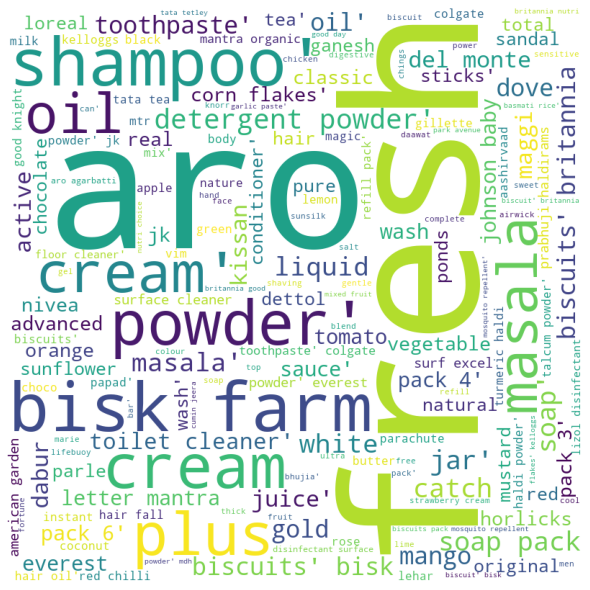

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in groupby_item_category_df['item description']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

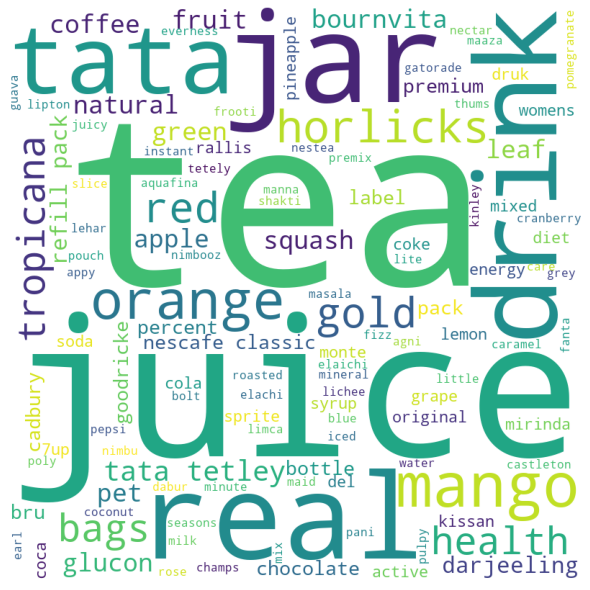

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
#groupby_item_category_df['Category']

In [ ]:
#Categories=groupby_item_category_df['Category'].tolist()

In [ ]:
#Categories

In [ ]:
#for x in Categories:
  #print(x)

In [ ]:
#len(Categories)

In [ ]:
#Categories[15]

In [ ]:
len(groupby_item_category_df['Category'])

22

In [ ]:
groupby_item_category_df['Category'][0]

18

WORD CLOUD OF CATEGORY 18


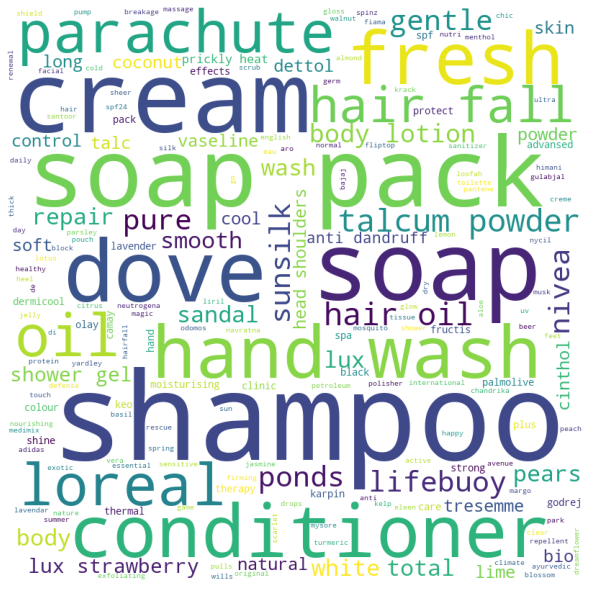

WORD CLOUD OF CATEGORY 20


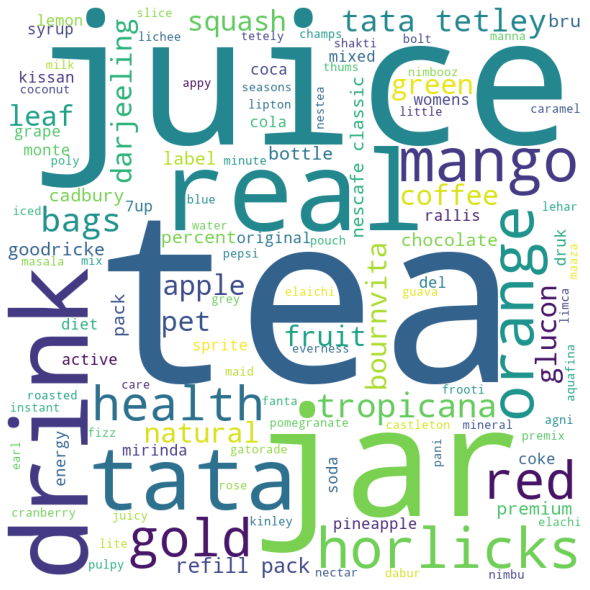

WORD CLOUD OF CATEGORY 5


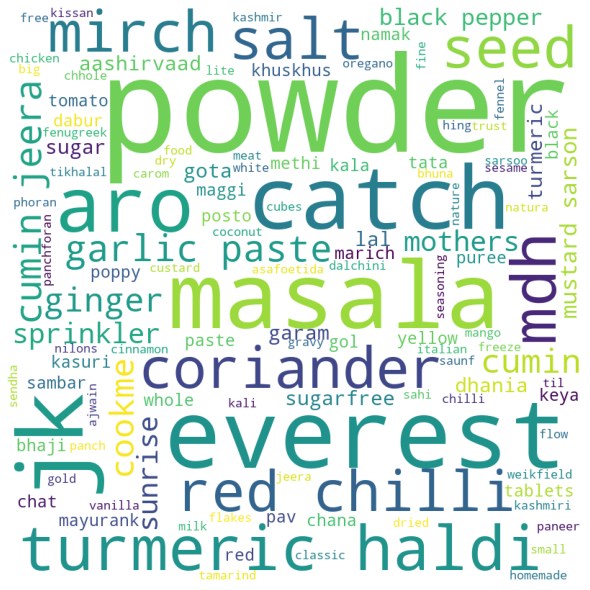

WORD CLOUD OF CATEGORY 11


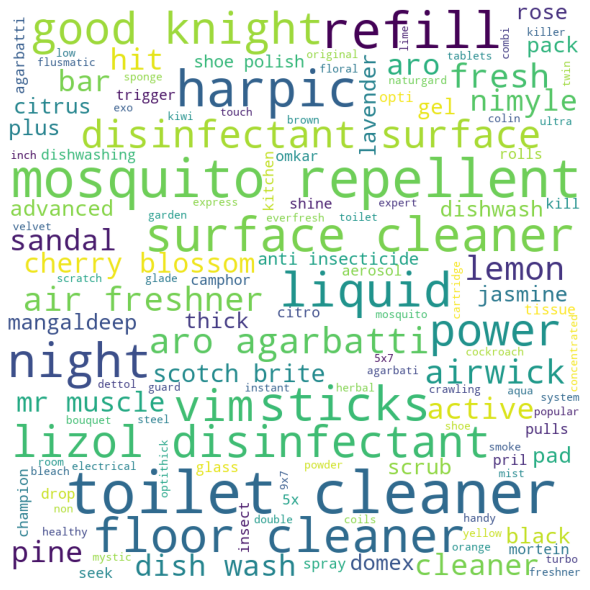

WORD CLOUD OF CATEGORY 3


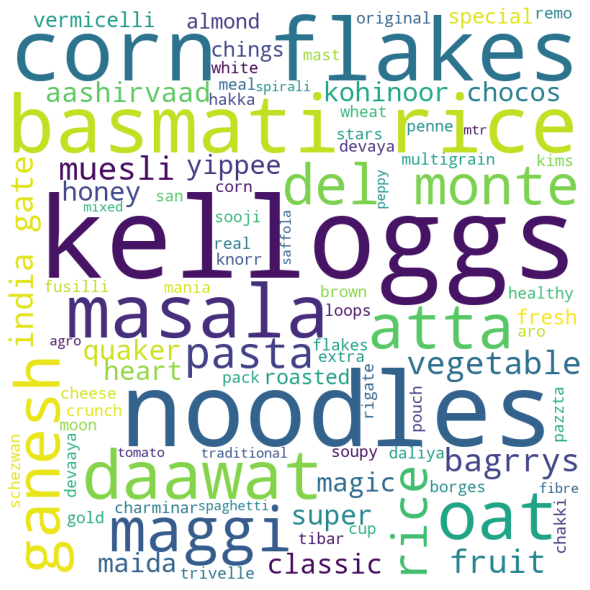

WORD CLOUD OF CATEGORY 2


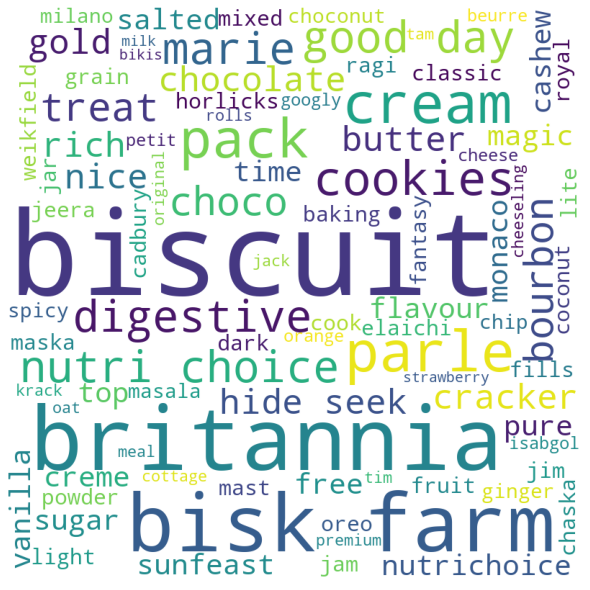

WORD CLOUD OF CATEGORY 8


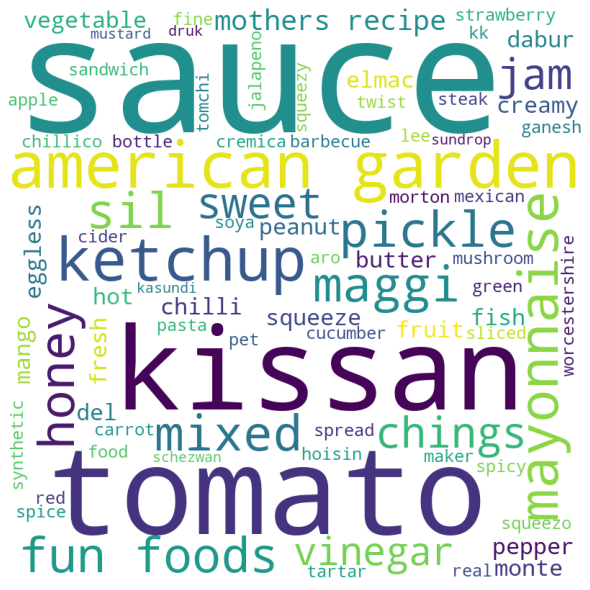

WORD CLOUD OF CATEGORY 12


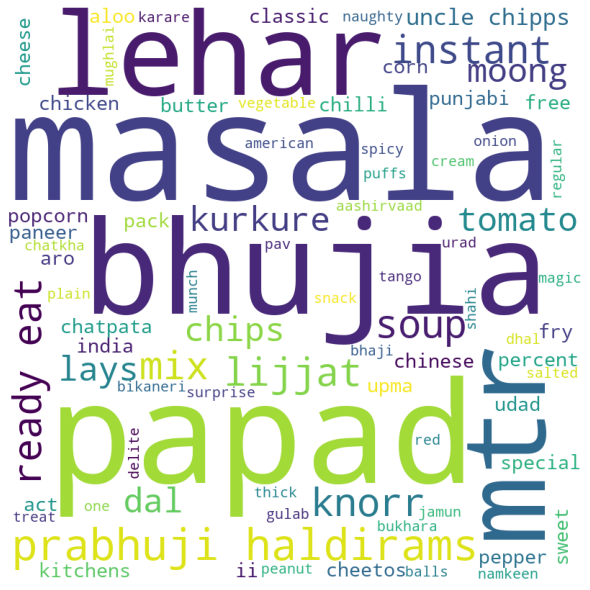

WORD CLOUD OF CATEGORY 13


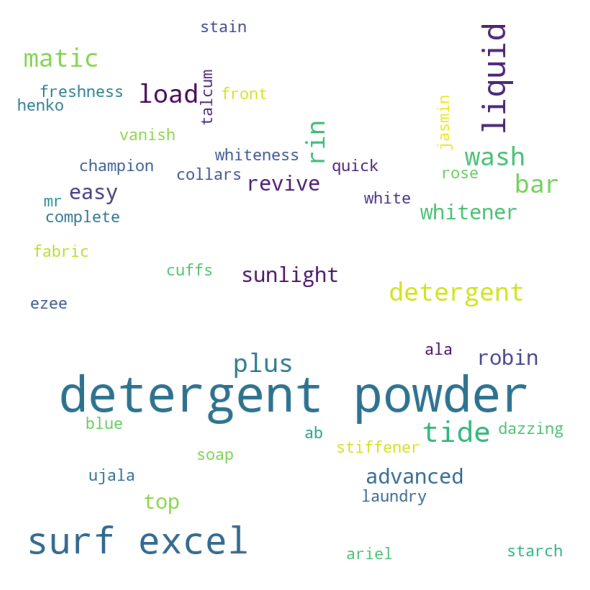

WORD CLOUD OF CATEGORY 16


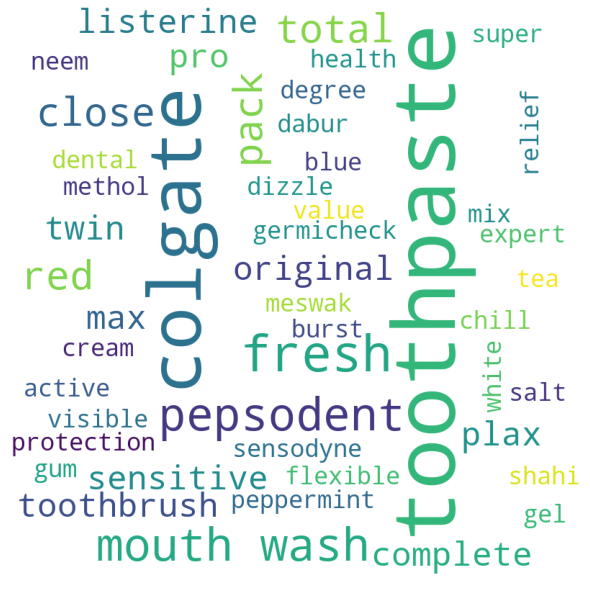

WORD CLOUD OF CATEGORY 14


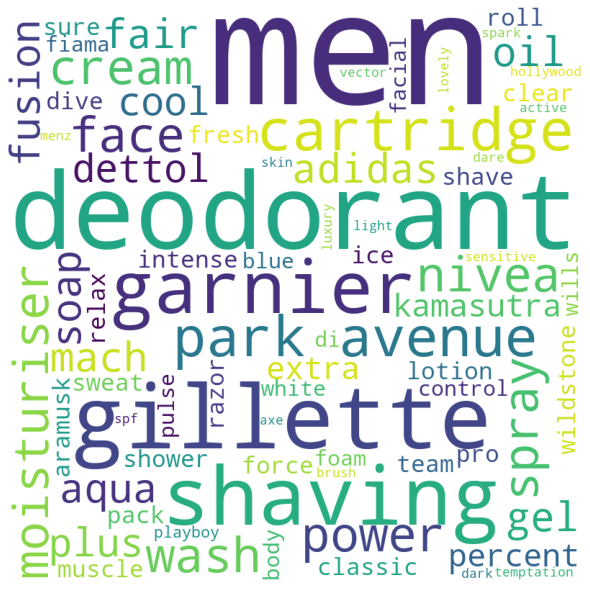

WORD CLOUD OF CATEGORY 1


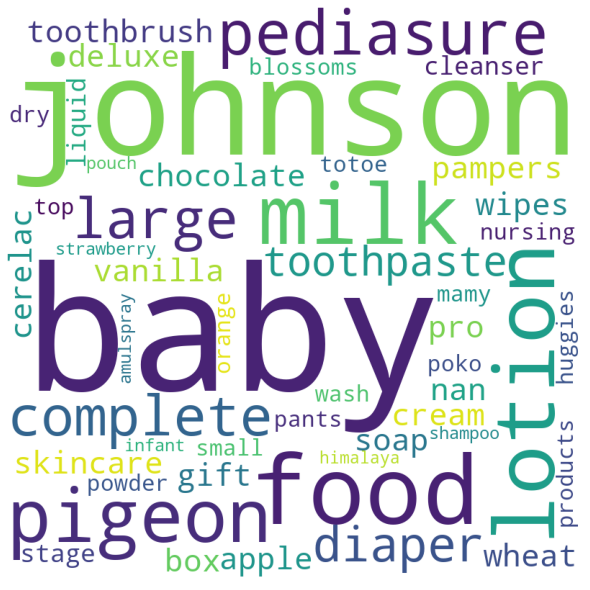

WORD CLOUD OF CATEGORY 7


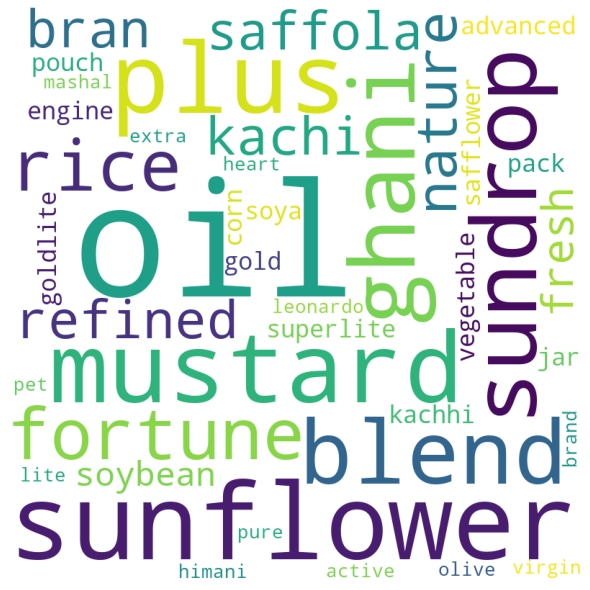

WORD CLOUD OF CATEGORY 10


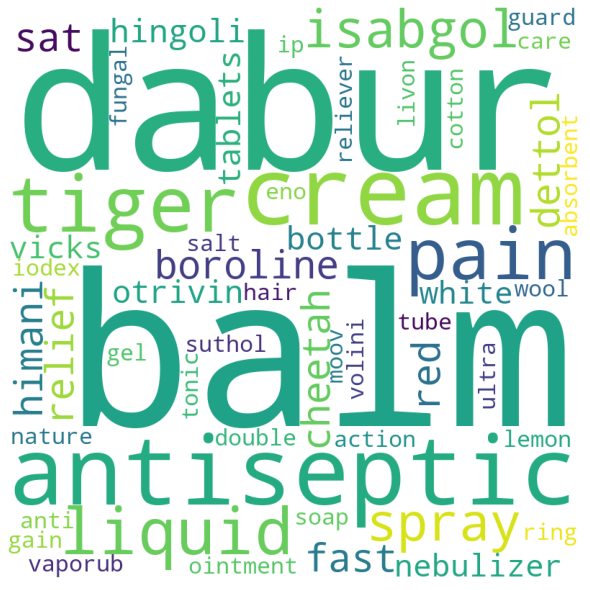

WORD CLOUD OF CATEGORY 21


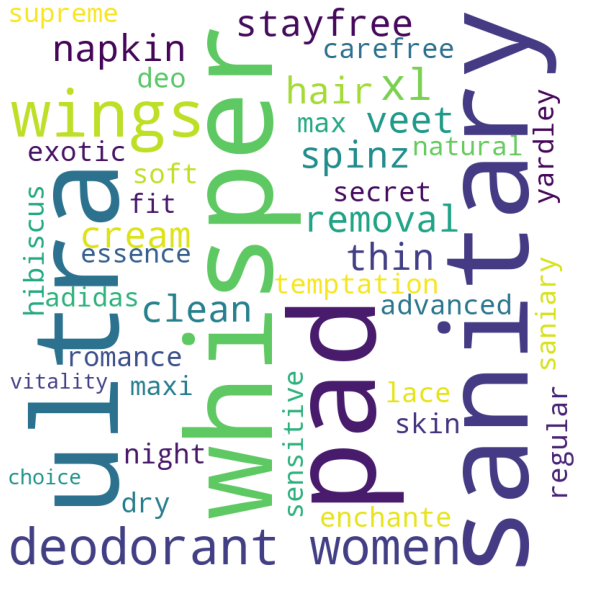

WORD CLOUD OF CATEGORY 22


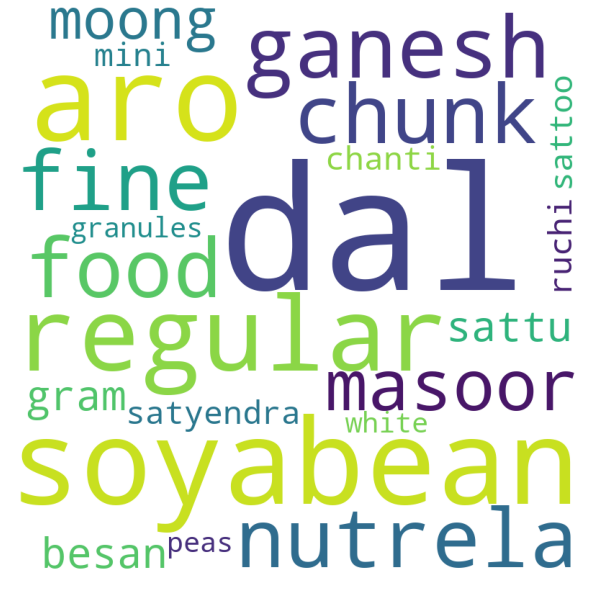

WORD CLOUD OF CATEGORY 6


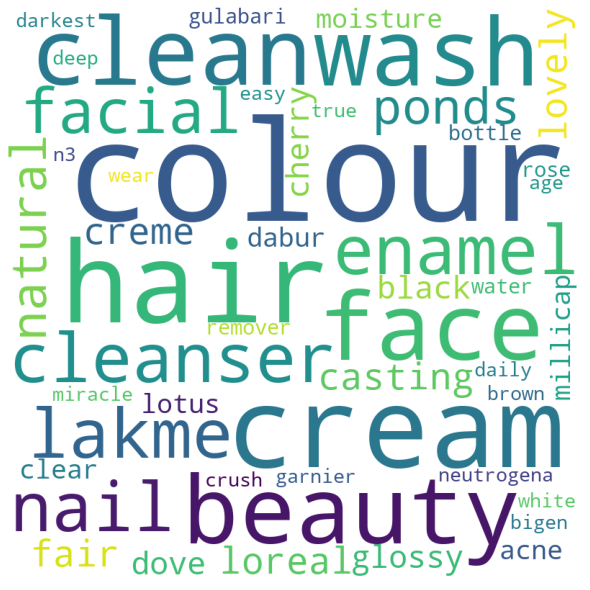

WORD CLOUD OF CATEGORY 15


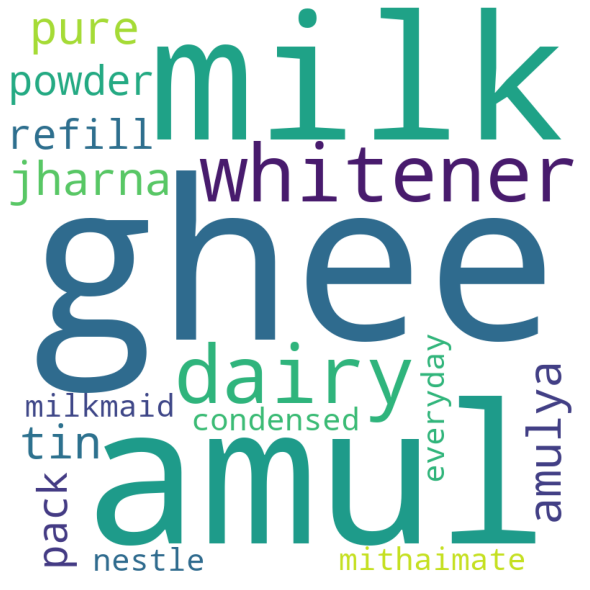

WORD CLOUD OF CATEGORY 19


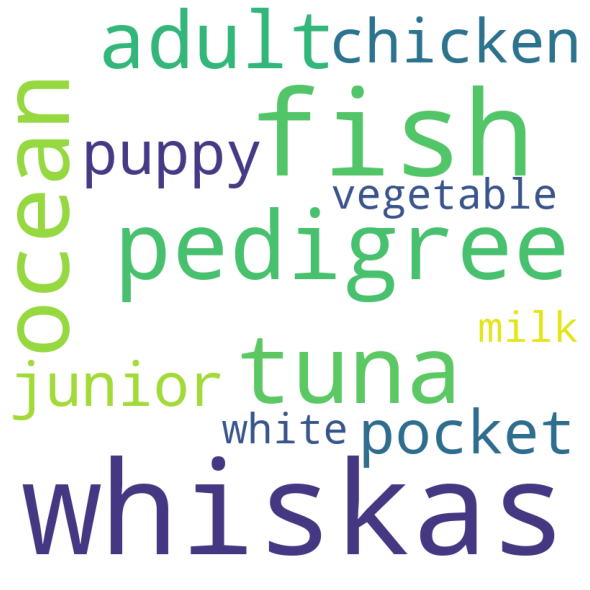

WORD CLOUD OF CATEGORY 17


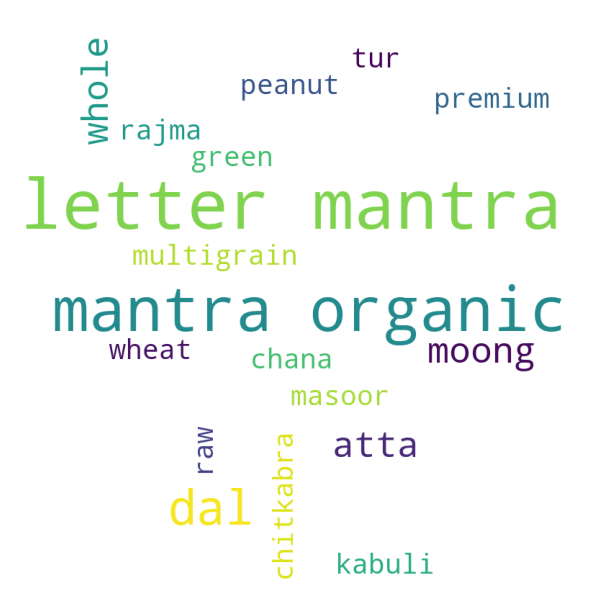

WORD CLOUD OF CATEGORY 4


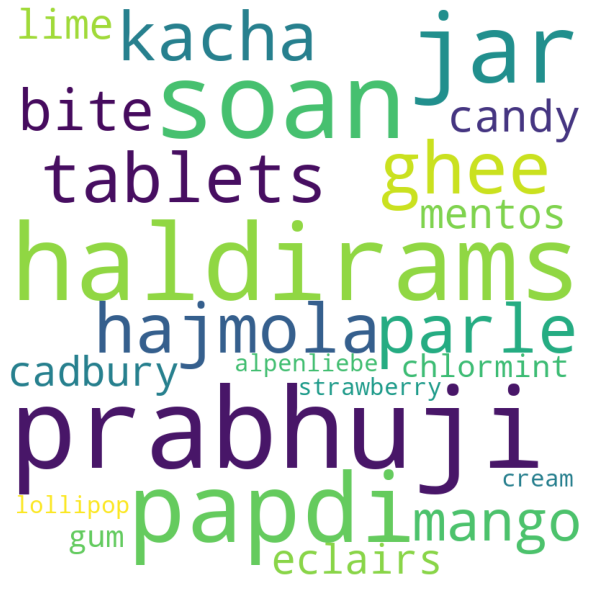

WORD CLOUD OF CATEGORY 9


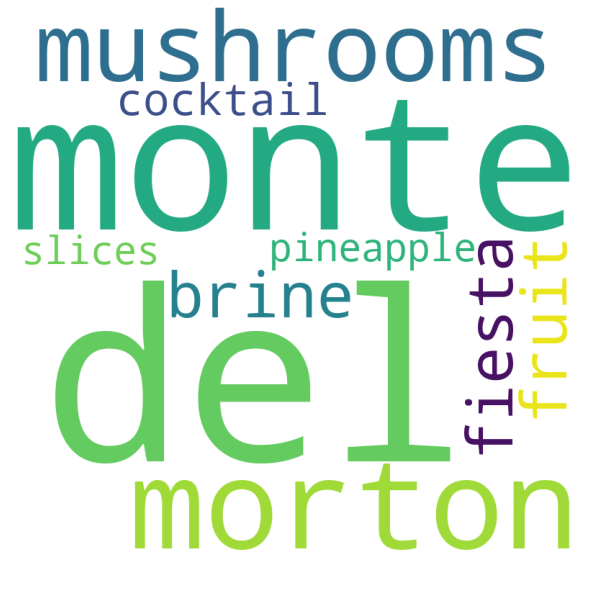

In [ ]:
for j in range(len(groupby_item_category_df['Category'])):
 text =groupby_item_category_df['item description'][j]
 comment_words = '' 
 stopwords = set(STOPWORDS) 
  
 # iterate through the csv file 
 for val in text: 
      
     # typecaste each val to string 
     val = str(val) 
  
     # split the value 
     tokens = val.split() 
      
     # Converts each token into lowercase 
     for i in range(len(tokens)): 
         tokens[i] = tokens[i].lower() 
      
     comment_words += " ".join(tokens)+" "
  
 wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
 # plot the WordCloud image                        
 plt.figure(figsize = (8, 8), facecolor = None) 
 plt.imshow(wordcloud) 
 plt.axis("off") 
 plt.tight_layout(pad = 0)
 print('WORD CLOUD OF CATEGORY '+ str(groupby_item_category_df['Category'][j])) 
 plt.show()  

In [ ]:
#customer_df['Category'] = customer_df['Category'].map( {'F': 0, 'M': 1} ).astype(int)

In [ ]:
customer_df['Category'] = customer_df['Category'].map( {1:'Baby Items',2:'Cookies',3:'Food',4:'Chocolate & Sweets Type',5:'Spices',6:'Cosmetic',7:'Oil Type',8:'Sauce',9:'Masrooms & Fruit Cocktail',10:'Balm Type',11:'Cleaner and Incenses',12:'Chips & Popcorns',13:'Detergent',14:'Men Cosmetic',15:'Milk Related',16:'Toothpaste',17:'Dal & Atta',18:'Soap & Shampoo',19:'Pet Food',20:'Drinks',21:'Women Items',22:'Dal Soyabeen Chattu'} ).astype(str)

In [ ]:
customer_df.head()

Customer_Id Customer_Location  Latitude  Longitude  Order_Id  Item_Id  \
0           22         Kalikapur       NaN        NaN        93     4892   
1           22         Kalikapur       NaN        NaN        93     4893   
2           22         Kalikapur       NaN        NaN        93     4894   
3           22         Kalikapur       NaN        NaN        93     1948   
4           22         Kalikapur       NaN        NaN         9     3875   

   Quantity  Price  Zone Code  Supplier Id  \
0         3   9.00        160            1   
1         3   9.00        160            1   
2         3   9.00        160            1   
3         1  15.00        160            1   
4         1  14.28        160            1   

                         Item Description              Category  Sub Category  \
0            Mangaldeep Sandal Agarbattis  Cleaner and Incenses           146   
1            Mangaldeep 3 in 1 Agarbattis  Cleaner and Incenses           146   
2  Mangaldeep Bouquet Agarbati 100 Sticks  Cleaner and Incenses           146   
3      JK Fennel Seeds Whole (Saunf Gota)                Spices            35   
4               Sunlight Laundry Soap Bar             Detergent            96   

   Total_Cost  
0       27.00  
1       27.00  
2       27.00  
3       15.00  
4       14.28

In [ ]:
'''for j in range(len(Categories)):
 text =groupby_item_category_df['item description'][j]
 comment_words = '' 
 stopwords = set(STOPWORDS) 
  
 # iterate through the csv file 
 for val in text: 
      
     # typecaste each val to string 
     val = str(val) 
  
     # split the value 
     tokens = val.split() 
      
     # Converts each token into lowercase 
     for i in range(len(tokens)): 
         tokens[i] = tokens[i].lower() 
      
     comment_words += " ".join(tokens)+" "
  
 wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
 # plot the WordCloud image                        
 plt.figure(figsize = (8, 8), facecolor = None) 
 plt.imshow(wordcloud) 
 plt.axis("off") 
 plt.tight_layout(pad = 0)
 print('WORD CLOUD OF CATEGORY '+ str(Categories[j])) 
  
 plt.show()'''  

'for j in range(len(Categories)):\n text =groupby_item_category_df[\'item description\'][j]\n comment_words = \'\' \n stopwords = set(STOPWORDS) \n  \n # iterate through the csv file \n for val in text: \n      \n     # typecaste each val to string \n     val = str(val) \n  \n     # split the value \n     tokens = val.split() \n      \n     # Converts each token into lowercase \n     for i in range(len(tokens)): \n         tokens[i] = tokens[i].lower() \n      \n     comment_words += " ".join(tokens)+" "\n  \n wordcloud = WordCloud(width = 800, height = 800, \n                background_color =\'white\', \n                stopwords = stopwords, \n                min_font_size = 10).generate(comment_words) \n  \n # plot the WordCloud image                        \n plt.figure(figsize = (8, 8), facecolor = None) \n plt.imshow(wordcloud) \n plt.axis("off") \n plt.tight_layout(pad = 0)\n print(\'WORD CLOUD OF CATEGORY \'+ str(Categories[j])) \n  \n plt.show()'

In [ ]:
customer_df.columns

Index(['Customer_Id', 'Customer_Location', 'Latitude', 'Longitude', 'Order_Id',
       'Item_Id', 'Quantity', 'Price', 'Zone Code', 'Supplier Id',
       'Item Description', 'Category', 'Sub Category', 'Total_Cost'],
      dtype='object')

In [ ]:
locations=pd.DataFrame({"Name":customer_df['Customer_Location'].unique()})
locations['Name']=locations['Name'].apply(lambda x:  str(x)  )
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)


locations['geo_loc']=lat_lon
locations.to_csv('locations.csv',index=False)

In [ ]:
locations

Name  \
0                                                                                                    Kalikapur   
1                                                                                   A10 Sourav Abasan ED Block   
2                                        4B Somtirtha Bhawan, 377 Jesore Road, Mrinalini Cinema, Nager Bazar,    
3                                                                                               3 Jessore Road   
4                                Flat-3B, Sagarika Apartment, 8/2/127, Aurobindo Sarani, Kamalapur(E), Dum Dum   
..                                                                                                         ...   
133                                                    4, Queens Mansions (1st Lift-2nd floor) 12, Park Street   
134                                                                c/o Bandhani, 16-B, Sarat Bose Road,Kolkata   
135     Flat 3 A ruby park cooperative housing society building no. 2 kasba rathtala haltu opposite masterpada   
136                                                 Flat 4/B, Divine Apartments, 16, Motijhil Avenue, Motijhil   
137  'DEBO VILLA'. Plot No BE-78. Premises No. 02-139. Rajarhat. New Town Action Area 1. Opposite HIDCO Bhawan   

                      geo_loc  
0    (22.3315784, 90.3333234)  
1                         NaN  
2                         NaN  
3    (22.6800036, 88.4538818)  
4                         NaN  
..                        ...  
133                       NaN  
134                       NaN  
135                       NaN  
136                       NaN  
137                       NaN  

[138 rows x 2 columns]

Demands Of Items 

In [ ]:
#Customer_location=

In [ ]:
temp =customer_df[['Customer_Id', 'Order_Id', 'Customer_Location']].groupby(['Customer_Id', 'Order_Id', 'Customer_Location']).count()
temp = temp.reset_index(drop = False)
location_1 = temp['Customer_Location'].value_counts()
print('Nb. de pays dans le dataframe: {}'.format(len(location_1)))

Nb. de pays dans le dataframe: 138


In [ ]:
import plotly.graph_objs as go

In [ ]:
data = dict(type='choropleth',
locations2 = location_1.index,
locations = ["India"],
locationmode = 'location names', z = location_1,
locationmode = 'country names',
text = location_1.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per location',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

SyntaxError: ignored

In [ ]:
!pip install geopy

In [ ]:
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
   
# declare an empty list to store 
# latitude and longitude of values  
# of city column 
longitude = [] 
latitude = [] 
   
# function to find the coordinate 
# of a given city  
def findGeocode(city): 
       
    # try and catch is used to overcome 
    # the exception thrown by geolocator 
    # using geocodertimedout   
    try: 
          
        # Specify the user_agent as your 
        # app name it should not be none 
        geolocator = Nominatim(user_agent="Google Maps") 
          
        return geolocator.geocode(city) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(city)     
  
# each value from city column 
# will be fetched and sent to 
# function find_geocode    
for i in (customer_df["Customer_Location"]): 
      
    if findGeocode(i) != None: 
           
        loc = findGeocode(i) 
          
        # coordinates returned from  
        # function is stored into 
        # two separate list 
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    # if coordinate for a city not 
    # found, insert "NaN" indicating  
    # missing value  
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan) 

In [ ]:
customer_df.columns

In [ ]:
supplier_df = pd.read_excel('/content/retailer supplier data.xlsx')

In [ ]:
supplier_df